GOOGLE PLAYSTORE-ANALYSIS

Ojective:

Google Play Store team is about to launch a new feature where in certain apps that are 
promising are boosted in visibility. The boost will manifest in multiple ways – higher priority in 
recommendations sections (“Similar apps”, “You might also like”, “New and updated games”). 
These will also get a boost in visibility in search results. This feature will help bring more 
attention to newer apps that have potential.
The task is to understand what makes an app perform well - size? price? category? multiple 
factors together? Analyze the data and present your insights in a format consumable by 
business – the final output of the analysis would be presented to business as insights with 
supporting data/visualizations

IMPORT LIBRARY

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()
import plotly.graph_objects as go
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

ModuleNotFoundError: No module named 'plotly'

In [2]:
df=pd.read_csv('E:\Python\Data\playstore-analysis.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [8]:
df.describe()

,Rating,Size
count,9367.000000,10841.000000
mean,4.193338,21516.529524
std,0.537431,20746.537567
min,1.000000,8.500000
25%,4.000000,5900.000000
50%,4.300000,18000.000000
75%,4.500000,26000.000000
max,19.000000,100000.000000


# 1.Data cleaning-Missing value identification & treating.

a.)Drop record values where rating is missing since rating is our target/study variable.

In [9]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [17]:
df1=df.dropna(subset=['Rating'])

In [18]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

b.)Check null values for the andriod ver column.

In [20]:
df1['Android Ver'].isnull().sum() 

3

In [21]:
df1[df1.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.000000,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.000000,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.000000,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.000000,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [23]:
df.loc[[4453,4490,10472]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#Two missing values from 3rd record.

1.content rating.

2.andriod ver.

$droping down the 3rd record.

In [26]:
df2=df1.drop(10472)

In [27]:
try:
    df2.loc[[10472]]
except KeyError:
    print("successfully deleted")

successfully deleted


Replace remaining missing values with mode.

In [28]:
df3=df2.copy(deep=True)
df3['Android Ver']=df2['Android Ver'].fillna(df2['Android Ver'].mode()[0])

In [29]:
df3.loc[[4453,4490]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,4.1 and up


Missing values of Android ver is now 4.1 and up

C.)Current ver - replace with most common value.

In [30]:
df3[df3.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


Most common value current ver

In [34]:
mode_cv=df3['Current Ver'].value_counts().idxmax()
print(mode_cv)

Varies with device


In [35]:
df4=df3.copy(deep=True)
df4[df4.isna().any(axis=1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [36]:
df4['Current Ver']=df3['Current Ver'].fillna(mode_cv)
df4.loc[[15,1553,6322,7333]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",Varies with device,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",Varies with device,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",Varies with device,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",Varies with device,4.0 and up


# 2.Data cleanup and correcting the data types

a.Which all variables need to be brought to numeroc types?

In [37]:
df4.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Following variables need to be brought to numeric types.

*Reviews

*Installs

*Price

In [38]:
df5=df4.copy(deep=True)

b.Price variable-remove$sign and convert to float.

In [39]:
df5['Price']=df5['Price'].str.replace('$','')

C:\Users\hp\AppData\Local\Temp/ipykernel_5712/1922019346.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df5['Price']=df5['Price'].str.replace('$','')


In [40]:
df5.loc[[4453,7333]]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,0.99,Everyone,Puzzle,"April 18, 2018",Varies with device,4.0 and up


$ sign operator from price is removed

In [41]:
df5['Price']=df5['Price'].astype(float)

In [42]:
df5['Price'].dtypes

dtype('float64')

price variable is now a float type.

c.Installs - remove ',' and '+' sign, convert to integer.

In [43]:
df5['Installs']=df5['Installs'].str.replace('+','')
df5['Installs']=df5['Installs'].str.replace(',','')

C:\Users\hp\AppData\Local\Temp/ipykernel_5712/3075346893.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df5['Installs']=df5['Installs'].str.replace('+','')


In [44]:
df5.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [45]:
df5['Installs']=df5['Installs'].astype(int)

In [46]:
df5['Installs'].dtypes

dtype('int32')

signs are removed and converted to integer types.

d.convert all other identified coloumns to numeric.

In [47]:
df5.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Reviews are converted to be numeric data types.

In [51]:
df5['Reviews']=df5['Reviews'].astype(int)
df5['Price']=df5['Price'].astype(int)

In [52]:
df5['Reviews'].dtypes
df5['Price'].dtypes

dtype('int32')

In [53]:
df5.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int32
Type               object
Price               int32
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

As before indicated variables are now numeric types

*Reviews

*Installs

*Price

# 3.Sanity checks - check for the following and handle accordingly.

a. Avg.rating should be between 1 and 5, as only these values are allowed in play store.

1.Are they are such records?Drip if so.

In [54]:
check1=df5['Rating'] > 5

In [55]:
check1.any()

False

In [56]:
check2=df5['Rating'] < 1

In [57]:
check2.any()

False

No such records are founded.

b.Reviews should not be  more than installs as only those who installed can Review the app. 

1.Are they such records?drop if so.

In [58]:
dfcheck=pd.DataFrame()
dfcheck=df5[df5.Reviews > df5.Installs]

In [59]:
dfcheck.shape

(7, 13)

In [60]:
dfcheck.head(7)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In this we have identified 7 invalid records.

In [61]:
df6=df5.copy(deep=0)
df6.drop(df5[df5.Reviews > df5.Installs].index,inplace = True)

In [63]:
dfcheck1 = df6[df6.Reviews >df6.Installs]
dfcheck1.shape

(0, 13)

All invalid records are dropped.

# 4.Identify and handle outliers.

a.Price column

1.Make suitable plot to identify outliers in place.

In [64]:
def plot_box(df,c1):
    df.boxplot(column=[c1])
    plt.grid(False)
    plt.show()

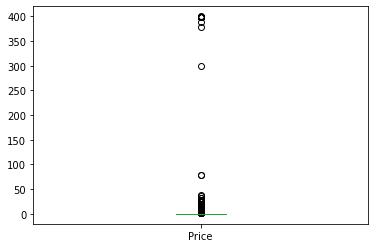

In [65]:
plot_box(df6,"Price")

It indicates they have many outliers.

In [70]:
def outliers(df,c1):
    q1=df[c1].quantile(0.25)
    q3=df[c1].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    
    ls=df.index[(df[c1]<lower_bound) | (df[c1]>upper_bound)]
    return ls


In [71]:
indexes=outliers(df6,"Price")

In [72]:
indexes

Int64Index([  234,   235,   290,   291,   427,   476,   477,   481,   571,
              851,
            ...
            10586, 10594, 10645, 10675, 10679, 10682, 10690, 10760, 10782,
            10785],
           dtype='int64', length=644)

In [73]:
len(indexes)

644

There are totally 538 outliers are founded in Price.

2.Do you expect apps on the play store to cost $200?Check out these cases.

In [74]:
df6.loc[df6['Price'] > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


As per above statements the costs of apps represents $200.

3.After dropping the useless records, make the suitable plot again to identify outliers.

In [75]:
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df


In [76]:
dfcleaned=remove(df6,indexes)

In [77]:
print(df6.shape,
dfcleaned.shape)

(9359, 13) (8715, 13)


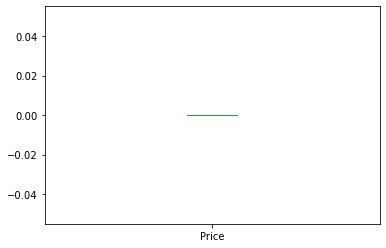

In [78]:
plot_box(dfcleaned,"Price")

4.Limit data to records with price <$30.

In [79]:
dflimit=df6[df6['Price']<30]

In [80]:
print(df6.shape,
      dflimit.shape)

(9359, 13) (9338, 13)


b.Reviews column.

1.Make suitable plot.

Genres
Communication                  815461799
Social                         621241071
Casual                         412078812
Action                         350303919
Arcade                         336990376
                                 ...    
Puzzle;Education                     834
Card;Brain Games                     685
Comics;Creativity                    516
Books & Reference;Education          471
Board;Pretend Play                     4
Name: Reviews, Length: 115, dtype: int32


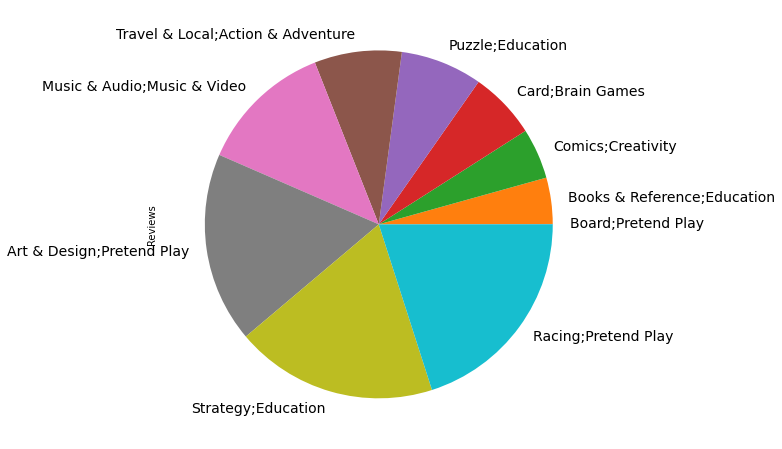

In [81]:
total=df6.groupby('Genres')['Reviews'].sum().sort_values()
plt.subplots(figsize=(15,8))
total.head(10).plot(kind='pie',fontsize=14)

print(total.sort_values(ascending=False))
plt.show()

Top 10 reviewd apps by Genre

2.Limit data to apps with < 1Million reviews.

In [82]:
dflim=df6[df6['Reviews']<1000000]
dflim=dflimit.sort_values(["Reviews"],ascending=False)
dflim.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306,21516.529524,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,21516.529524,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device


In [83]:
print(df6.shape,dflim.shape)

(9359, 13) (9338, 13)


c.Installs

1.What is the 95th percentile of the installs?

In [84]:
print("95th percentile of the installs:\n",df6.Installs.quantile(0.95))

95th percentile of the installs:
 100000000.0


2.Drop records having a value more than the 95th percentile.

In [97]:
df6[df6['Reviews'] > 100000000.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There are no values greater than 95th percentile.

In [98]:
indices=df6[df6['Reviews'] > 100000000.0].index
df6.drop(indices,inplace = True)

# Data analysis to answer business questions

5.What is the distribution of ratings like?(use seaborn)More skewed towards higher/lower values?

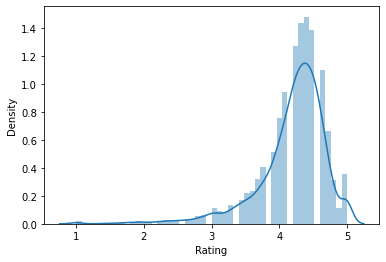

In [101]:
sns.distplot(df6['Rating'])
plt.show()

From the above representing chart most of the rating lies between 4 and 5.

b.what is the implication of this in your analysis?

Real life distributions are usually skewed. If there are too much skewness in the data, then many statistical model don’t work. So in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model’s performance especially regression-based models. So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution. This will allow us to try more number of statistical model.

Conclusion: If we have a skewed data then it may harm our results. So, in order to use a skewed data we have to apply a log transformation over the whole set of values to discover patterns in the data and make it usable for the statistical model.

# 6.What are the top content rating values?


In [102]:
print("top Content Rating values :\n",df6['Content Rating'].value_counts())

top Content Rating values :
 Everyone           7414
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64


In [103]:
Adult_rating = df[df['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated =df[df['Content Rating'] == 'Unrated'].index.to_list()
df.drop(Adult_rating, inplace = True)
df.drop(unrated, inplace = True)
df['Content Rating'].value_counts()

Everyone        8714
Teen            1208
Mature 17+       499
Everyone 10+     414
Name: Content Rating, dtype: int64

From the above values in the content rating adults+18 and unrated has only a few records and it has been removed/droped.

In [104]:
import plotly.graph_objects as go

fig = go.Figure(go.Pie(
    name = "",
    values = [7414,1083,461,397],
    labels = ['Everyone','Teen','Mature 17+','Everyone 10+'],
))
fig.show()

# 7. Effect of size on rating.

a. Make a joinplot to understand the effect of size on rating.

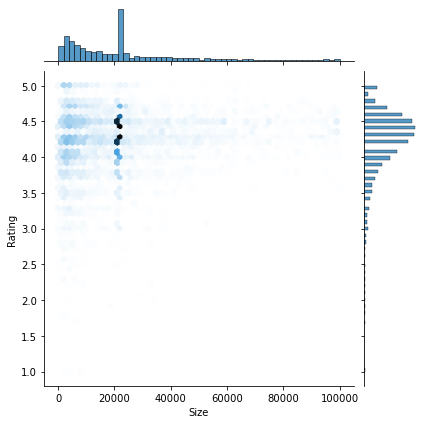

In [105]:
sns.jointplot(x=df6['Size'],y=df6['Rating'],data=df6,kind='hex')
plt.show()

b. Do you see any patterns?
   
   The most of the data is in between Rating 3.5-5.0 and size 0-40000. and data is dense on rating 4.5 and little bellow and      size of 20000

c. How do you explain the pattern?
   
   Apps that has size of 20mb are most rated and apps with size less than 20mb are not much rated also it gets even worse after 20mb as size increases ratings decreases

# 8. Effect of price on rating.

a. Make a jointplot (with regression line).

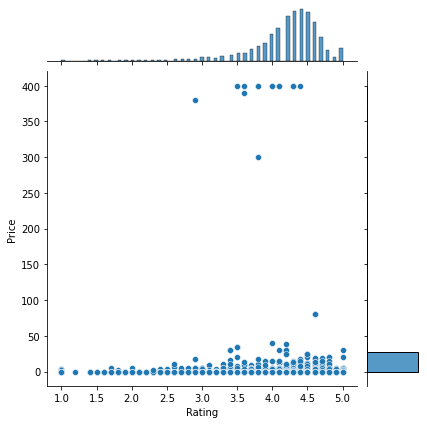

In [106]:
sns.jointplot(x ="Rating" , y = "Price" ,data = df6)
plt.show()

b. What pattern do you see?
   most rated apps are under $50

c. How do you explain the pattern?
   Most expensive apps don't get much rating

d. Replot the data, this time with only records with price >0.

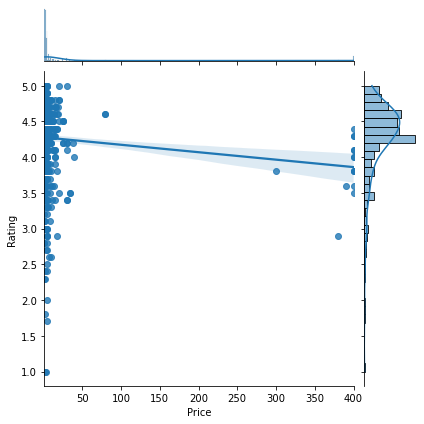

In [107]:
Price_greaterthan_zero = df6[df6['Price'] > 0]
sns.jointplot(x ="Price" , y = "Rating" ,data = Price_greaterthan_zero, kind = "reg" )
plt.show()

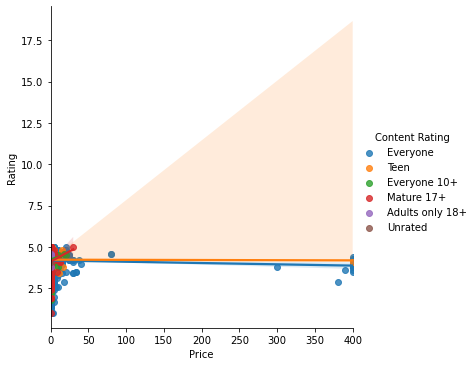

In [108]:
sns.lmplot(x='Price', y='Rating', hue ='Content Rating', data=df6)
plt.show()

# 9. Look at all the numeric interactions together –
 
 a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price'.

In [ ]:
sns.pairplot(df6,vars=['Reviews','Size', 'Rating', 'Price'])
plt.show()

# 10.Rating vs. content rating.

a. Make a bar plot displaying the rating for each content rating.

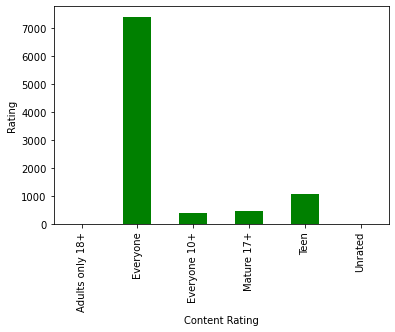

In [110]:
df6.groupby(['Content Rating'])['Rating'].count().plot.bar(color="green")
plt.ylabel('Rating')
plt.show()

b. Which metric would you use? Mean? Median? Some other quantile?

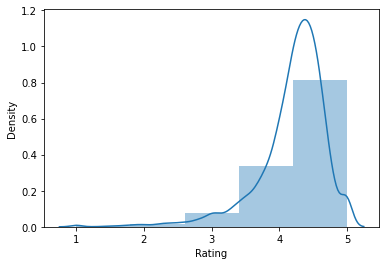

In [111]:
sns.distplot(df6['Rating'],bins=5)
plt.show()

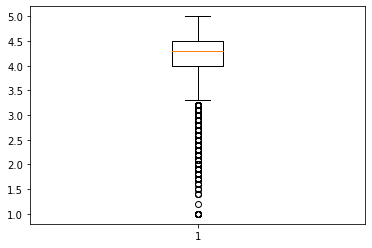

In [112]:
plt.boxplot(df6['Rating'])
plt.show()

Mean

The distribution of data is left skewed and has outliers.The mean is better than the median because it isn’t influenced by Outliers.

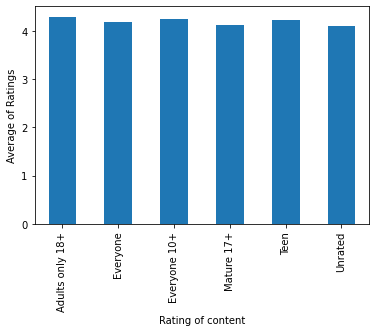

In [113]:
ax=df6['Rating'].groupby(df6['Content Rating']).mean().plot(kind = 'bar')
ax.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

# 11. Content rating vs. size vs. rating – 3 variables at a time
  
  a. Create 5 buckets (20% records in each) based on Size.

In [114]:
bins=[0, 4600, 12000, 21516, 32000, 100000]
df['Size_Buckets'] = pd.cut(df['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(df, values='Rating', index='Size_Buckets', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,4.116056,4.188889,3.951429,4.232323
LOW,4.161853,4.207143,4.129592,4.209655
MED,4.188627,4.300000,3.900000,4.131847
HIGH,4.245527,4.227273,4.208497,4.243333
VERY HIGH,4.208134,4.287805,4.197170,4.279603


b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each combination.

In [ ]:
df.Size.quantile([0.2, 0.4,0.6,0.8])


In [ ]:
df.Rating.quantile([0.2, 0.4,0.6,0.8])

c. Make a heatmap of this

i. Annotated

ii. Greens color map

In [ ]:
Size_Buckets =pd.pivot_table(df6, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

In [ ]:
sns.heatmap(Size_Buckets, annot = True,linewidth=0.5)
plt.show()

In [ ]:
sns.heatmap(Size_Buckets, annot=True,linewidth=0.5, cmap='Greens')
plt.show()

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

   As we can see last two rows have 4 and more ratings except two spots and first two rows have 4 and below ratings except two spots therefore we can say that Heavier apps preferred in all categories.